## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras 

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

#因為資料太大導致記憶體不足，修改樣本量
x_train=x_train[0:1000,:]
x_test=x_test[0:100,:]

y_train=y_train[0:1000,:]
y_test=y_test[0:100,:]

In [13]:
def build_mlp(input_shape,output_units=10):
    """Code Here
    建立你的神經網路
    
    """
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=50, activation="relu")(input_layer)
    x = keras.layers.Dense(units=10, activation='relu')(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = [0.5,0.7,0.95]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                153650    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
output (Dense)               (None, 10)                110       
Total params: 154,270
Trainable params: 154,270
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 253us/step - loss: 2.5287 - acc: 0.0930 - val_loss: 2.3038 - val_acc: 0.0600
Epoch 2/50
1000/1000 [===========================

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 263us/step - loss: 2.3181 - acc: 0.0940 - val_loss: 2.3015 - val_acc: 0.0600
Epoch 2/50
1000/1000 [==============================] - 0s 93us/step - loss: 2.3042 - acc: 0.1120 - val_loss: 2.3030 - val_acc: 0.0600
Epoch 3/50
1000/1000 [==============================] - 0s 89us/step - loss: 2.3034 - acc: 0.1120 - val_loss: 2.3014 - val_acc: 0.0600
Epoch 4/50
1000/1000 [==============================] - 0s 85us/step - loss: 2.3031 - acc: 0.0970 - val_loss: 2.3034 - val_acc: 0.0600
Epoch 5/50
1000/1000 [==============================] - 0s 122us/step - loss: 2.3032 - acc: 0.1030 - val_loss: 2.3018 - val_acc: 0.0600
Epoch 6/50
1000/1000 [==============================] - 0s 102us/step - loss: 2.3043 - acc: 0.1120 - val_loss: 2.3015 - val_acc: 0.0600
Epoch 7/50
1000/1000 [==============================] - 0s 133us/step - loss: 2.3041 - acc: 0.0990 - val_loss: 2.3042 - val_acc: 0.0600
Epoc

1000/1000 [==============================] - 0s 136us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 4/50
1000/1000 [==============================] - 0s 143us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 5/50
1000/1000 [==============================] - 0s 131us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 6/50
1000/1000 [==============================] - 0s 141us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 7/50
1000/1000 [==============================] - 0s 140us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 8/50
1000/1000 [==============================] - 0s 112us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 9/50
1000/1000 [==============================] - 0s 99us/step - loss: 14.5224 - acc: 0.0990 - val_loss: 14.0227 - val_acc: 0.1300
Epoch 10/50
1000/1000 [=======================

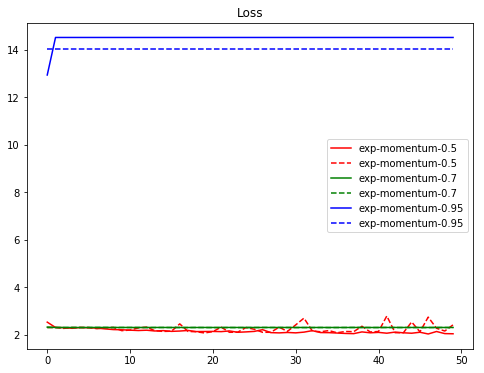

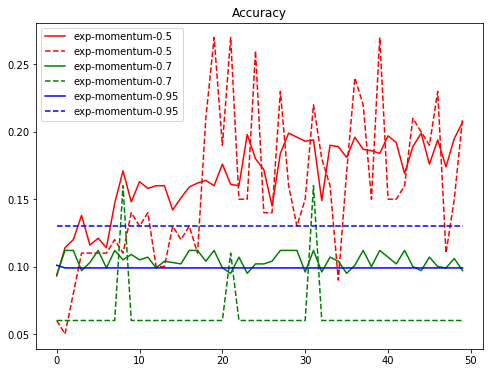

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
#plt.show()